# **Title:** Predicting Bail status and Bail amount charged


**Author:** Snigdha Panakanti

**Term:** Summer 2023

Importing required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Loading the dataset:

In [2]:
df = pd.read_csv('/content/PretrialReleaseDataExtractWeb.csv')

In [3]:
df.head()

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x866BC1A9D02C2D5D8C5E012A1263CBCB186AAD4EC432...,Female,White,Unknown,32.0,0.0,Queens Criminal Court,NY040033J,Queens,District 11,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,NaN
1,0x19CE12EEBB600591525A623342A703545C8217AECBED...,Male,Black,Non Hispanic,38.0,38.0,New York Criminal Court,NY030033J,New York,District 1,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,325544.0
2,0xF7CC1FA4C28B406C23DB333B96623EE4B85C447CA524...,Male,Unknown,Unknown,31.0,31.0,Syracuse City Court,NY033011J,Onondaga,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x6D65E9BD03FE9F08760481FD325804F8F74FF2C874E1...,Unknown,Unknown,Unknown,28.0,28.0,Rome City Court,NY032011J,Oneida,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0xB9F29E48ABC1069053C191061BB6B3B0792DBCD96FD1...,Male,White,Non Hispanic,36.0,36.0,New York Criminal Court,NY030033J,New York,District 1,...,10.0,0.0,1.0,1.0,0.0,Misdemeanor,1/1/2020,0.0,NaN,355075.0


In [4]:
df.shape

(284098, 108)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Columns: 108 entries, Internal_Case_ID to arr_cycle_id
dtypes: float64(20), object(88)
memory usage: 234.1+ MB


In [6]:
df.describe()

,Age_at_Crime,Age_at_Arrest,App_Count_Arraign_to_Dispo_Released,App_Count_Arraign_to_Dispo_Detained,App_Count_Arraign_to_Dispo_Total,Num_of_ROW,Days_Arraign_Remand_First_Released,Known_Days_in_Custody,Days_Arraign_Bail_Set_to_First_Posted,Days_Arraign_Bail_Set_to_First_Release,Days_Arraign_to_Dispo,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest_firearm,arr_cycle_id
count,284096.000000,284096.000000,284096.000000,284096.000000,284096.000000,284096.000000,6659.000000,284096.000000,12314.000000,35968.000000,224316.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,239984.000000,235933.000000
mean,35.193185,34.948334,3.161713,0.612353,3.774066,0.069160,37.961406,11.815302,14.441936,41.888679,114.048877,0.201926,0.478294,1.972682,0.083039,0.178116,0.237474,0.091464,0.007317,351409.914255
std,11.876270,12.336724,3.006000,1.703410,3.221497,0.326338,66.781975,52.189276,38.888718,73.820571,119.521512,0.485111,0.959980,3.110412,0.275942,0.382611,0.425536,0.288269,0.085227,68352.132232
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235934.000000
25%,26.000000,26.000000,1.000000,0.000000,2.000000,0.000000,5.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,291760.000000
50%,33.000000,33.000000,2.000000,0.000000,3.000000,0.000000,7.000000,0.000000,2.000000,7.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350281.000000
75%,42.000000,42.000000,4.000000,0.000000,5.000000,0.000000,38.000000,0.000000,8.000000,46.000000,178.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,410404.000000
max,93.000000,93.000000,61.000000,61.000000,72.000000,8.000000,586.000000,12161.000000,543.000000,583.000000,611.000000,2.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,471866.000000


In [7]:
df.isnull().sum()

Internal_Case_ID              2
Gender                        2
Race                          2
Ethnicity                     2
Age_at_Crime                  2
                          ...  
rearrest                  44114
rearrest_date            236147
rearrest_firearm          44114
rearrest_date_firearm    282342
arr_cycle_id              48165
Length: 108, dtype: int64

In [8]:
for col in df.columns:
    print(col)

Internal_Case_ID
Gender
Race
Ethnicity
Age_at_Crime
Age_at_Arrest
Court_Name
Court_ORI
County_Name
District
Region
Court_Type
Judge_Name
Offense_Date
Arrest_Date
Arrest_Type
Top_Arrest_Law
Top_Arrest_Article_Section
Top_Arrest_Attempt_Indicator
Top_Charge_at_Arrest
Top_Charge_Severity_at_Arrest
Top_Charge_Weight_at_Arrest
Top_Charge_at_Arrest_Violent_Felony_Ind
Case_Type
First_Arraign_Date
Top_Arraign_Law
Top_Arraign_Article_Section
Top_Arraign_Attempt_Indicator
Top_Charge_at_Arraign
Top_Severity_at_Arraign
Top_Charge_Weight_at_Arraign
Top_Charge_at_Arraign_Violent_Felony_Ind
Arraign Charge Category
Representation_Type
App_Count_Arraign_to_Dispo_Released
App_Count_Arraign_to_Dispo_Detained
App_Count_Arraign_to_Dispo_Total
Def_Attended_Sched_Pretrials
Remanded_to_Jail_at_Arraign
ROR_at_Arraign
Bail_Set_and_Posted_at_Arraign
Bail_Set_and_Not_Posted_at_Arraign
NMR_at_Arraign
Release Decision at Arraign
Representation_at_Securing_Order
Pretrial_Supervision_at_Arraign
Contact_Pretrial_Servi

As we can see, there are 108 columns in the dataset. Let's check if they all are valid for the analysis.

According to the documentation provided on the website: https://www.nycourts.gov/legacypdfs/court-research/PretrialReleaseDataDictionaryWeb.pdf, all the columns seem to be important.

So, as given in the documentation, let's divide the required columns in the dataset into a sub-dataset and clean the dataset easy to explore further.

For predicting the bail decision:

In [9]:
req_col1 = ['Gender', 'Age_at_Crime', 'Race','Ethnicity','Offense_Date', 'Arraign Charge Category', 'Representation_Type','Release Decision at Arraign','County_Name']

In [10]:
bail_status = df.filter(req_col1)

In [11]:
bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,County_Name
0,Female,32.0,White,Unknown,NaN,Criminal Contempt,Legal Aid,ROR,Queens
1,Male,38.0,Black,Non Hispanic,11/1/2019,Assault,Public Defender,ROR,New York
2,Male,31.0,Unknown,Unknown,4/1/2017,Unlicensed Operation,18B (Assigned Counsel),ROR,Onondaga
3,Unknown,28.0,Unknown,Unknown,4/1/2017,Unlicensed Operation,Public Defender,Disposed at arraign,Oneida
4,Male,36.0,White,Non Hispanic,1/1/2020,Larceny,Legal Aid,Nonmonetary release,New York


In [12]:
bail_status.isnull().sum()

Gender                             2
Age_at_Crime                       2
Race                               2
Ethnicity                          2
Offense_Date                    1409
Arraign Charge Category            2
Representation_Type            16814
Release Decision at Arraign        2
County_Name                        2
dtype: int64

In [13]:
bail_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Gender                       284096 non-null  object 
 1   Age_at_Crime                 284096 non-null  float64
 2   Race                         284096 non-null  object 
 3   Ethnicity                    284096 non-null  object 
 4   Offense_Date                 282689 non-null  object 
 5   Arraign Charge Category      284096 non-null  object 
 6   Representation_Type          267284 non-null  object 
 7   Release Decision at Arraign  284096 non-null  object 
 8   County_Name                  284096 non-null  object 
dtypes: float64(1), object(8)
memory usage: 19.5+ MB


In [14]:
bail_status['Offense_Date']= pd.to_datetime(bail_status['Offense_Date'])
bail_status['Offense_Date'].replace(np.nan, bail_status['Offense_Date'].mode().iloc[0],inplace=True)

In [15]:
bail_status['Age_at_Crime'].fillna(int(bail_status['Age_at_Crime'].mode()), inplace=True)

In [16]:
bail_status['Representation_Type'].fillna(bail_status['Representation_Type'].mode().iloc[0], inplace=True)

In [17]:
bail_status = bail_status.dropna()

In [18]:
bail_status.isnull().sum()

Gender                         0
Age_at_Crime                   0
Race                           0
Ethnicity                      0
Offense_Date                   0
Arraign Charge Category        0
Representation_Type            0
Release Decision at Arraign    0
County_Name                    0
dtype: int64

Converting the categorical values to numerical data based on each column as it will be needed to provide inputs to Machine Learning models.

In [19]:
bail_status.loc[bail_status['Age_at_Crime'] <= 20, 'age_group'] = 0
bail_status.loc[bail_status['Age_at_Crime'].between(21,35), 'age_group'] = 1
bail_status.loc[bail_status['Age_at_Crime'].between(36,50), 'age_group'] = 2
bail_status.loc[bail_status['Age_at_Crime'] >= 50, 'age_group'] = 3

In [20]:
bail_status['offense_year'] = pd.to_datetime(bail_status['Offense_Date']).dt.strftime('%Y')

In [21]:
bail_status['offense_year'] = bail_status['offense_year'].astype(float)

In [22]:
bail_status.loc[bail_status['offense_year'] <= 2010, 'offense_timeperiod'] = '0'
bail_status.loc[bail_status['offense_year'].between(2010,2019), 'offense_timeperiod'] = '1'
bail_status.loc[bail_status['offense_year'] == 2020, 'offense_timeperiod'] = '3'
bail_status.loc[bail_status['offense_year'] > 2020, 'offense_timeperiod'] = '4'

In [23]:
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Bail-set', 'Bail_status'] = 1
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Disposed at arraign', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'ROR', 'Bail_status'] = 1
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Nonmonetary release', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Remanded', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Unknown', 'Bail_status'] = 0

In [24]:
bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,County_Name,age_group,offense_year,offense_timeperiod,Bail_status
0,Female,32.0,White,Unknown,2020-01-01,Criminal Contempt,Legal Aid,ROR,Queens,1.0,2020.0,3,1.0
1,Male,38.0,Black,Non Hispanic,2019-11-01,Assault,Public Defender,ROR,New York,2.0,2019.0,1,1.0
2,Male,31.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,18B (Assigned Counsel),ROR,Onondaga,1.0,2017.0,1,1.0
3,Unknown,28.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,Public Defender,Disposed at arraign,Oneida,1.0,2017.0,1,0.0
4,Male,36.0,White,Non Hispanic,2020-01-01,Larceny,Legal Aid,Nonmonetary release,New York,2.0,2020.0,3,0.0


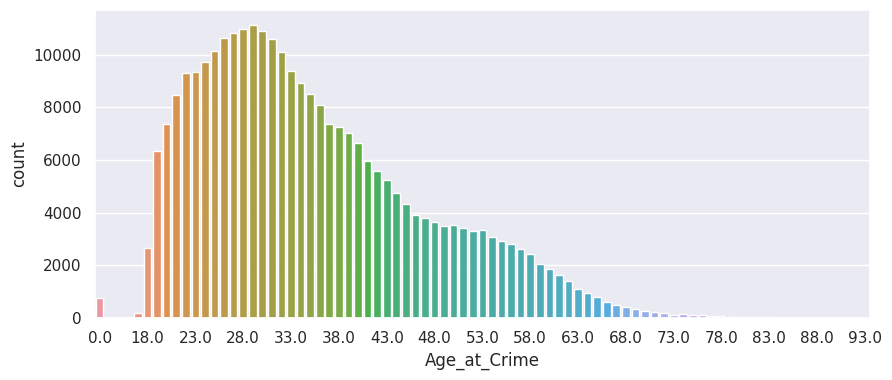

In [25]:
# Visualizing the age distribution at crime
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(x="Age_at_Crime", data=bail_status)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=bail_status, x='Age_at_Crime', bins=20)
plt.xlabel('Age at Crime')
plt.ylabel('Count')
plt.title('Age Distribution at Crime')
plt.show()

In [ ]:
# Creating a stacked bar plot to compare the counts of release decisions at arraign based on gender and race
cross_table = pd.crosstab(bail_status['Gender'], bail_status['Release Decision at Arraign'], normalize='index')
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Release Decisions by Gender')
plt.legend(title='Release Decision', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Used Encoding to convert Categorical to Numerical Values

In [ ]:
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder
use_col = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type','County_Name']

enc = LeaveOneOutEncoder(cols = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type','County_Name'])

In [ ]:
labels = bail_status['Bail_status'].copy()
final_bail_status = enc.fit_transform(bail_status,labels)

In [ ]:
final_bail_status.head()

In [ ]:
final_bail_status = final_bail_status.drop(columns = ['Offense_Date','age_group','offense_year','Release Decision at Arraign'])

In [ ]:
final_bail_status.head()

In [ ]:
sns.countplot(x='Bail_status',data = final_bail_status)
plt.title('Bail_set distribution')
position = (1,0)
labels = ("Bail Set", " Bail Not Set")
plt.xticks(position,labels)
plt.show()

In [ ]:
#Heatmap of the correlation of features
plt.figure(figsize=(8,8))
sns.heatmap(final_bail_status.corr(), annot=True);

To estimate bail amount:

In [ ]:
remove_col = ['Court_Name','County_Name', 'District', 'Region', 'Court_Type',
          'Warrant_Ordered_btw_Arraign_and_Dispo', 'DAT_WO_WS_Prior_to_Arraign',
          'First_Bench_Warrant_Date', 'Non_Stayed_WO', 'Num_of_Stayed_WO', 'Num_of_ROW',
          'Docket_Status', 'Disposition_Type', 'Disposition_Detail', 'Dismissal_Reason',
          'Disposition_Date', 'Most_Severe_Sentence', 'Top_Conviction_Law', 'Top_Conviction_Article_Section',
          'Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction', 'Top_Charge_Severity_at_Conviction',
          'Top_Charge_Weight_at_Conviction', 'Top_Charge_at_Conviction_Violent_Felony_Ind',
          'Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody', 'Days_Arraign_Bail_Set_to_First_Posted',
          'Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo', 'prior_vfo_cnt',
          'prior_nonvfo_cnt', 'prior_misd_cnt', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
          'rearrest', 'rearrest_date', 'rearrest_firearm', 'rearrest_date_firearm', 'arr_cycle_id','Partially_Secured_App_Bond_Perc', 'Bail_Made_Indicator',
          'First_Arraign_Date', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign',
          'Partially_Secured_Surety_Bond_Perc', 'Top_Arrest_Law', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Arraign_Attempt_Indicator',
          'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind',
          'Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender',
          'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School', 'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
          'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR', 'Order_of_Protection', "Representation_at_Securing_Order",
          'App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 'Top_Arrest_Article_Section',
          'Top_Arrest_Attempt_Indicator', 'Top_Charge_Weight_at_Arrest', 'Case_Type', 'Top_Charge_at_Arrest']

In [ ]:
df = df.drop(labels=remove_col, axis=1)
bail_amt = pd.DataFrame(df)

In [ ]:
bail_amt.head()

In [ ]:
bail_amt.shape

In [ ]:
bail_amt.columns

In [ ]:
# Dropping Nans

bail_amt = df.dropna(subset=["Internal_Case_ID","Gender","Race","Top_Charge_Severity_at_Arrest"])
bail_amt.isna().sum()

In [ ]:
# Replacing spaces with 0's
bail_amt.eq(" ").sum()
bail_amt = bail_amt.replace(" ", 0)
bail_amt.eq(" ").sum()

In [ ]:
# Creating a new Column for bail amount

bail_amt_cols = ['First_Bail_Set_Cash',
       'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
       'First_Secured_Surety_Bond', 'First_Secured_App_Bond',
       'First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond',
       'First_Partially_Secured_Surety_Bond',
       'First_Partially_Secured_App_Bond']

In [ ]:
for c in bail_amt_cols:
    s = bail_amt[c].str.strip()
    bail_amt[c] = pd.to_numeric(s)

In [ ]:
for c in bail_amt_cols:
    bail_amt[c].fillna(value=0, inplace=True)

In [ ]:
bail_amt["Bail_Amount"] = bail_amt[bail_amt_cols].max(axis=1)

# Replacing Nan values with max value

In [ ]:
bail_amt = bail_amt.drop(bail_amt_cols, axis=1)

In [ ]:
# Creating a column for Age
bail_amt["Age"] = bail_amt[["Age_at_Crime", "Age_at_Arrest"]].max(axis=1)

In [ ]:
# Converting Gender into Boolean
# Dropping "unknown" gender
gender_filter = (bail_amt["Gender"]!="Unknown")
bail_amt = bail_amt[gender_filter]

bail_amt["Gender"] = np.where(bail_amt["Gender"] == "male", 0, 1)

In [ ]:
# Converting violent felony into Boolean
bail_amt["Violent_Fel"] = np.where(bail_amt["Top_Charge_at_Arrest_Violent_Felony_Ind"] == "N", 0, 1)

In [ ]:
# Dropping Internal case ID column
bail_amt = bail_amt.drop(["Internal_Case_ID"],axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Bail Filter ( Only want to include cases where bail was assigned)
bail_filter = (bail_amt["Release Decision at Arraign"] == "Bail-set")
bail_amt = bail_amt[bail_filter]

In [ ]:
# Select years between 2018-2021
bail_amt["Arrest_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')
bail_amt["Offense_Date"] = pd.to_datetime(bail_amt["Arrest_Date"], format='%m/%d/%Y')

bail_amt["Arrest_Date"] = pd.DatetimeIndex(bail_amt["Arrest_Date"]).year
bail_amt["Offense_Date"] = pd.DatetimeIndex(bail_amt["Offense_Date"]).year


In [ ]:
dates = ["Arrest_Date","Offense_Date"]

In [ ]:
bail_amt["Year"] = bail_amt[dates].max(axis=1)

In [ ]:
bail_amt = bail_amt.dropna()

In [ ]:
year_filter = (bail_amt["Year"]>=2018)
bail_amt = bail_amt[year_filter]

In [ ]:
bail_amt = bail_amt.drop(["Arrest_Date","Offense_Date"],axis=1)

In [ ]:
final_bail_amt = pd.DataFrame(bail_amt)

In [ ]:
final_bail_amt.columns

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 6})
sns.barplot(data=final_bail_amt, y="Arraign Charge Category", x="Bail_Amount")
plt.xlabel("Arraign Charge Category")
plt.ylabel("Bail Amount")
plt.title("Bail Amount by Arraign Charge Category")
plt.show()

In [ ]:
crime = final_bail_amt[["Bail_Amount","Arraign Charge Category"]]

In [ ]:
crime.groupby(["Arraign Charge Category"]).agg(["count","min","median","max","mean","std"])

In [ ]:
final_bail_amt.describe()

In [ ]:
final_bail_amt.groupby(['Violent_Fel']).mean()

In [ ]:
final_bail_amt.groupby(['Violent_Fel']).median()

In [ ]:
final_bail_amt["Top_Charge_Severity_at_Arrest"].value_counts()

In [ ]:
ax = sns.countplot(x="Top_Charge_Severity_at_Arrest",
                   data=final_bail_amt)

In [ ]:
std_value = final_bail_amt["Bail_Amount"].std()
mean_value = final_bail_amt["Bail_Amount"].mean()

In [ ]:
add = (2*std_value) + mean_value
minus = mean_value - (2*std_value)

In [ ]:
add_outlier_filter = (final_bail_amt["Bail_Amount"]<=add)
minus_outlier_filter = (final_bail_amt["Bail_Amount"]>=minus)

final_bail_amt = final_bail_amt[add_outlier_filter]
final_bail_amt = final_bail_amt[minus_outlier_filter]

In [ ]:
final_bail_amt.agg(["max", "min","median"])

In [ ]:
ax = sns.countplot(x="Bail_Amount", data=final_bail_amt)